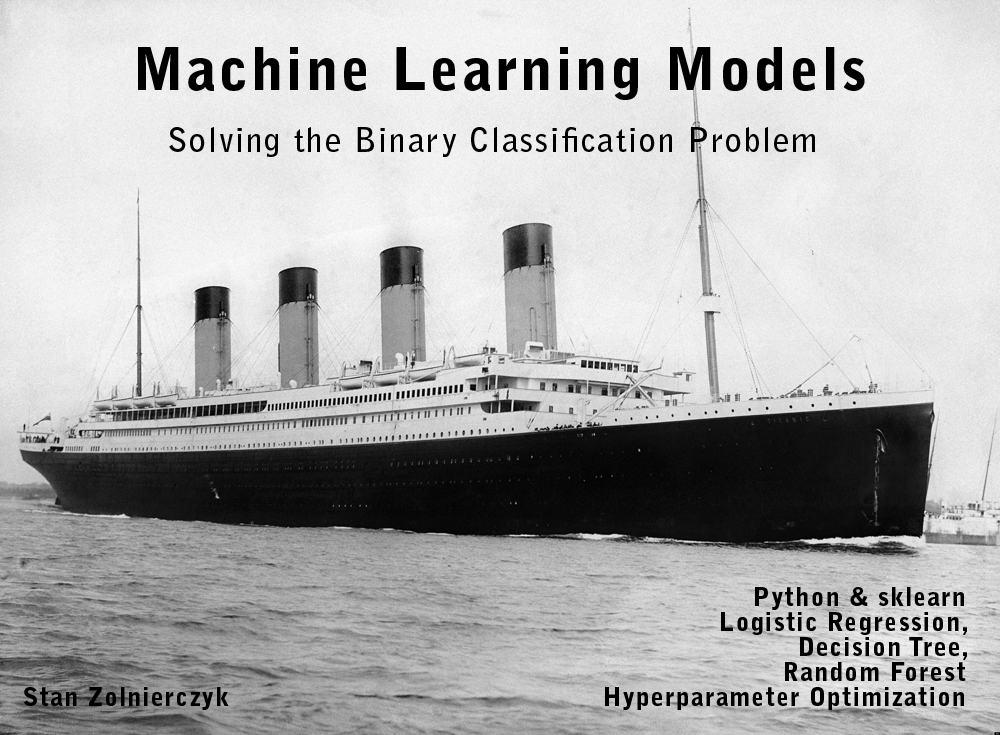

# Abstract

This presentation demonstrates how to use several different machine learning models available in the Python sklearn library to solve a binary classification problem. Logistic Regression, Decision Tree, and Random Forest models are compared, and the impact of model tuning via hyperparameter optimization on prediction results is analyzed.

Note: the data from the original dataset has already been cleaned (normalized, categorized, outliers removed etc., as shown in [my other presentation](https://github.com/stan-zolnierczyk/titanic-eda))

In [ ]:
# Import pandas
import pandas as pd
# Import the dataset from csv and change encoding
titanic = pd.read_csv("titanic_cleaned.csv", encoding = 'ISO-8859-1')

# Data Preparation for ML models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

First, a few words of explanation. The goal is as follows: I want to create a ML model that predicts the survival or non-survival (target variable in binary classification) of the Titanic disaster for a given passenger, depending on their individual characteristics: gender, age, ticket class, etc. (dependent variables, training data)

The original dataset contains all the information together, so first it needs to be divided appropriately.

The target variable. (It must be reshaped to fit the requirements of the training method)

In [ ]:
y = titanic["Survived"]
y = y.values.reshape(-1,1)

All the remaining characteristics will be used as dependent variables.

In [ ]:
x = titanic.drop("Survived", axis=1)

Another important step is to divide the datasets into training and test groups. Each model will be trained on the same training dataset, and its quality will be checked on a test dataset (not known to the model)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# Model 1: Logistic Regression

To build the model, and empty instance of the Logistic Regression model must be declared

In [ ]:
lg = LogisticRegression()

Train the model.

In [ ]:
lg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The model has been trained. Now it's time to check its quality. The most popular metric to do that is accuracy, which represents the ratio of correct predicions to the number of samples in the training data set.

In [ ]:
lg.score(x_train, y_train)

0.8163841807909604

The next and the most important step is to make a prediction on the test dataset.
So the instance 'lg' of the LogisticRegression model (previously trained on the (x_train,y_train) set) predicts the target variables 'y_pred' for the test set 'x_test'.

In [ ]:
y_pred = lg.predict(x_test)

In the end, the target variables calculated by the model (y_pred) are compared with the actual set of target variables (y_test). Similar 'accuracy_score' metrics is used to check the performance of the model on test dataset. (accuracy_score = number of correct predictions / total number of samples)

In [ ]:
accuracy_lg = accuracy_score(y_test, y_pred)
print(accuracy_lg)

0.7359550561797753


Another useful tool for analyzing model performance is the confusion matrix.

[[86 19]
 [28 45]]


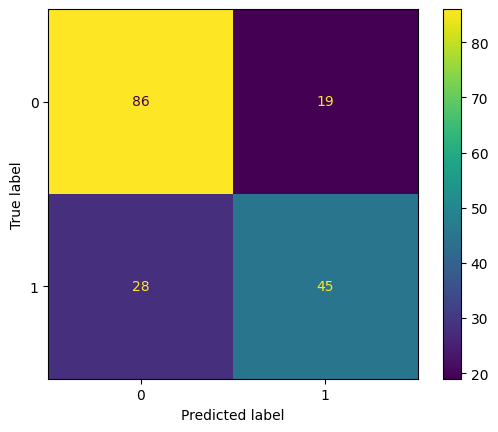

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

It allows for easy, visual overwiev of the number of correct and incorrect predictions.
In the bottom right corner are "true positives", i.e. the actual 1 matches the predicted 1. Similarly, in the top left corner are "true negatives", i.e. the actual 0 matches the predicted "0".
The other two corners are "false negatives" (bottom left) and "false positives" (top right)

"accuracy_score" = (true positives + false negatives) / sum of all samples

The confusion matrix is supplemented by the Classification Report. It shows the correct prediction rate for each class ('0' and '1'), as well as other metrics useful in assessing the quality of the model.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       105
           1       0.70      0.62      0.66        73

    accuracy                           0.74       178
   macro avg       0.73      0.72      0.72       178
weighted avg       0.73      0.74      0.73       178



# Model 2: Desicion Tree

DecisionTreeClassifier is another ML model available in "sklearn" library. The exact same steps will be followed to train it and check its perfomance.
Datasets for training and testing have already been prepared.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Create an empty instance of the model and train it on training dataset

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

Check the accuracy of the model.

In [ ]:
dt.score(x_train, y_train)

0.981638418079096

Calculate prediction ot test dataset and assess its accuracy.

In [ ]:
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.7191011235955056


Note: very good accuracy on training set, but average on test set (a bit lower than the LogisticRegression). Most likely this means there is an overfitting in the model - it is too well-fitted to the training data, which causes it to lose the ability to generalize to new, unfamiliar data.

Let's see the predition results using the confusion matrix...

[[77 28]
 [22 51]]


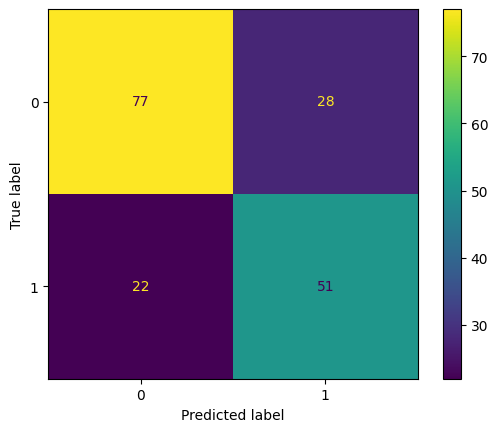

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
print(confusion_matrix(y_test, y_pred_dt))

... and classification repot

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       105
           1       0.65      0.70      0.67        73

    accuracy                           0.72       178
   macro avg       0.71      0.72      0.71       178
weighted avg       0.72      0.72      0.72       178



# Model 3: Random Forest

RandomForestClassifier will be the last ML model from "sklearn" library to be used in this presentation. Again, the exact same steps will be followed to train it and check its perfomance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create an instance of RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
#train the model
rf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=1000)

Check the accuracy for training dataset

In [ ]:
rf.score(x_train, y_train)

0.981638418079096

Calculate prediction and check its accuracy score.

In [ ]:
# Calculate prediction
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.7640449438202247


[[84 21]
 [21 52]]


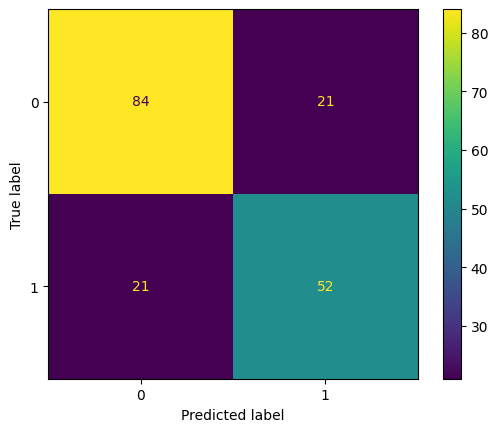

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       105
           1       0.71      0.71      0.71        73

    accuracy                           0.76       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.76      0.76      0.76       178



Comparison of the accuracy results for the training and test sets again indicates overfitting. One of the methods of reducing it will be shown ni the next chapter.

# Hyperparameters Optimization for ML Models



Parameter optimization is one of the methods of improving the quality of ML models. There are several ways to perform such optimization:

1. Manual. Changing selected model parameters according to the user's choice. Advantages: low computational cost. Disadvantages: there is no certainty that we will find the optimal parameters (or anything of good quality really)

2. Automatic RandomSearch - checks random combinations of metaparameters. Advantages: requires relatively little computing power. Disadvantages: the found combination of parameters may not be optimal.

3. Automatic GridSearchCV - searches all combinations of metaparameters in a given grid. Advantages: the method allows you to search more combinations of metaparameters and choose the optimal one from among them. Disadvantages: the method can be very computationally expensive, and with a large amount of data and a large number of metaparameters, practically impossible to implement.

Each model has its own individual parameters that can be subject to optimization.

Below is an example of using GridSearchCV automatic optimization for each of the 3 models presented above.

In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV for Logistic Regression:

In [ ]:
# Declare and instance of LogisticRegression model
lg_opt = LogisticRegression()

# Define the grid of hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],                     # Regularization parameter
    'penalty': ['l1', 'l2', 'none'],            # Type of Regularization
    'solver': ['liblinear', 'saga', 'lbfgs']    # Algorithm of Regularization
}
# Run GridSearchCV
grid_search_lg = GridSearchCV(estimator=lg_opt, param_grid=param_grid, cv=5, scoring='accuracy')

# Train all models from GridSearchCV
grid_search_lg.fit(x_train, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy')

In [ ]:
# Display the best parameters found
print("Best parameters: ", grid_search_lg.best_params_)

Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# Choose the best model found
best_model_lg = grid_search_lg.best_estimator_
# Predict using the best model
y_pred_lg_opt = best_model_lg.predict(x_test)

# Calculate the accuracy of the predicted target variable
accuracy_lg_opt = accuracy_score(y_test, y_pred_lg_opt)
print(accuracy_lg_opt)

0.7359550561797753


GridSearchCV for Decision Tree:

In [ ]:
# Declare and instance of DecisionTreeClassifier model
dt_opt = DecisionTreeClassifier()

# Define the grid of hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],        # Division criterion
    'max_depth': [3, 5, 10, None],           # Max depth of decision tree
    'min_samples_split': [2, 5, 9, 10]       # Min number of samples to split a node
}
# Run GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_opt, param_grid=param_grid, cv=5, scoring='accuracy')

# Train all models from GridSearchCV
grid_search_dt.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 9, 10]},
             scoring='accuracy')

In [ ]:
# Display the best parameters found
print("Best parameters: ", grid_search_dt.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


In [ ]:
# Choose the best model found
best_model_dt = grid_search_dt.best_estimator_
# Predict using the best model
y_pred_dt_opt = best_model_dt.predict(x_test)

# Calculate the accuracy of the predicted target variable
accuracy_dt_opt = accuracy_score(y_test, y_pred_dt_opt)
print(accuracy_dt_opt)

0.7865168539325843


GridSearchCV for RandomForest. Warning: it may take minutes to train the model (which confirms the computational cost mentioned above)

In [ ]:
# Declare and instance of RandomForestClassifier model
rf_opt = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],               # Number of Trees
    'max_depth': [None, 10, 20, 30],              # Max depth of a single Tree
    'min_samples_split': [2, 5, 10],              # Min number of samples to split
    'min_samples_leaf': [1, 2, 4],                # Min number of samples in a leaf
    'criterion': ['gini', 'entropy']              # Division Criterion
}

# Run GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_opt, param_grid=param_grid, cv=5, scoring='accuracy')

# Train all models from GridSearchCV
grid_search_rf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Display the best parameters found
print("Best parameters: ", grid_search_rf.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Choose the best model found
best_model_rf = grid_search_rf.best_estimator_

# Predict using the best model
y_pred_rf_opt = best_model_rf.predict(x_test)

# Calculate the accuracy of the predicted target variable
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
print("Best score for RandomForest: ", accuracy_rf_opt)

Best score for RandomForest:  0.7696629213483146


Finaly, it's time to compare those 6 models and draw some conclusions.

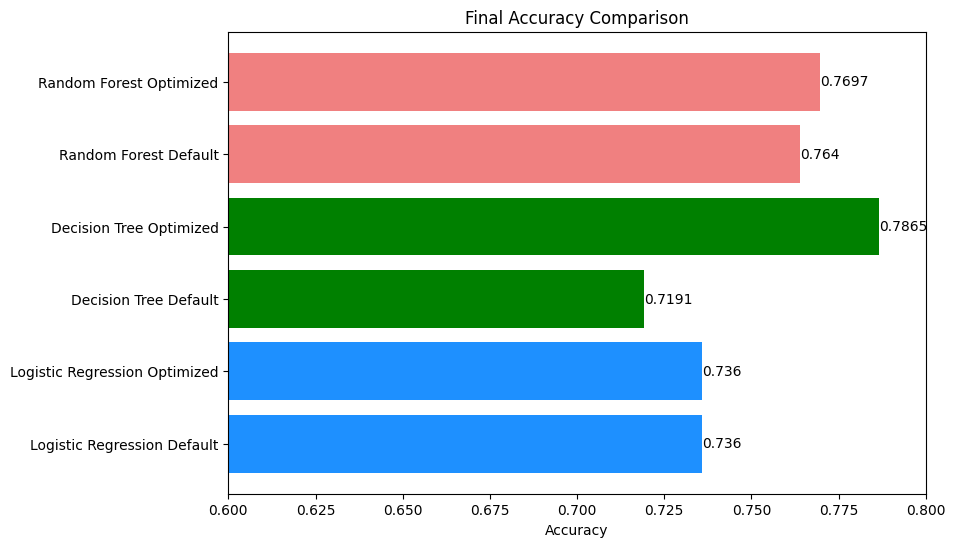

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of values
values = [accuracy_lg, accuracy_lg_opt, accuracy_dt, accuracy_dt_opt, accuracy_rf, accuracy_rf_opt]

# The labels for values
labels = ['Logistic Regression Default', 'Logistic Regression Optimized',
          'Decision Tree Default', 'Decision Tree Optimized',
          'Random Forest Default', 'Random Forest Optimized']

# Definine colors of bars
colors = ['dodgerblue', 'dodgerblue', 'green', 'green', 'lightcoral', 'lightcoral']

# Position indexes (in reversed order)
y_pos = np.arange(len(labels))

# Create horizontal bar graph
plt.figure(figsize=(9, 6))
graph = plt.barh(y_pos, values, color=colors)

# Add value-as-text next to each bar
for bar in graph:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(float(xval),4), ha='left', va='center')

# Title and Labels
plt.xlabel('Accuracy')
plt.title('Final Accuracy Comparison')
plt.yticks(y_pos, labels)

# Narrow the range for the X axis
plt.xlim(0.6, 0.8)
# Display
plt.show()

# Conclusions

As demonstrated in the above presentation, machine learning algorithms have coped quite well with the presented problem of binary classification.

The final success of the ML process is influenced by many factors:
- training data should be properly prepared (cleaned)
- ML model should be properly selected for the specifics of the problem
- adjustment (tuning) of hyperparameters,
- increasing the amount of training data
- equalization (balancing) of classes.

Proper tuning of hyperparameters can be of great importance for the quality of the final model - i.e. DecisionTree: the model with default parameters had the worst result, and after optimization it ultimately turned out to be the best.

Selection of the appropriate model and optimization of its hyperparameters is a very complex issue. Even the use of automatic optimization methods of hyperparameters such as GridSearchCV requires some intuition and expert knowledge when selecting a grid of parameters, because due to the computational complexity, searching through all possible combinations is practically impossible.